Importing libraries

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

Loading CIFAR100 dataset

In [26]:
(trnImages, trnLabels), (tstImages, tstLabels) = tf.keras.datasets.cifar10.load_data()


Shape of images and labels (For Reference)

In [27]:
print("Train images:", trnImages.shape)
print("Train labels:", trnLabels.shape)
print("Test images:", tstImages.shape)
print("Test labels:", tstLabels.shape)

Train images: (50000, 32, 32, 3)
Train labels: (50000, 1)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 1)


Classes of CIFAR10

In [28]:
class_list = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


Reshaping the labels to 1D array (Useful for my plt_sample function)

In [29]:
trnLabels = trnLabels.reshape(-1,)

plt_sample function, takes in trn images, trn labels, index of desired sample and class list.

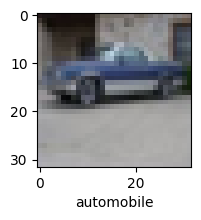

In [30]:
def plt_sample(X, y, index, classes_list):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes_list[y[index]])
plt_sample(trnImages,trnLabels,10000,class_list)

Normalizing pixel values

In [31]:
trnImages = trnImages/255
tstImages = tstImages/255

# Method #1 - ANN Model:
Building the ANN model by creating 3 dense layers, each containting different amount of neurons.

In [32]:
ann = tf.keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Compiling the ANN model

In [33]:
ann.compile(optimizer="SGD",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])


Calling the fit function on the training samples

In [34]:
ann.fit(trnImages, trnLabels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 139s 88ms/step - loss: 1.8136 - accuracy: 0.3553
Epoch 2/10
1563/1563 [==============================] - 128s 82ms/step - loss: 1.6230 - accuracy: 0.4250
Epoch 3/10
1563/1563 [==============================] - 127s 82ms/step - loss: 1.5448 - accuracy: 0.4538
Epoch 4/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.4824 - accuracy: 0.4785
Epoch 5/10
1563/1563 [==============================] - 135s 86ms/step - loss: 1.4317 - accuracy: 0.4933
Epoch 6/10
1563/1563 [==============================] - 135s 86ms/step - loss: 1.3903 - accuracy: 0.5131
Epoch 7/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.3524 - accuracy: 0.5257
Epoch 8/10
1563/1563 [==============================] - 129s 83ms/step - loss: 1.3151 - accuracy: 0.5361
Epoch 9/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.2839 - accuracy: 0.5508
Epoch 10/10
1563/1563 [==============================] 

Evaluating the ANN model on test image and labels (Unseen new samples)

In [35]:
ann.evaluate(tstImages,tstLabels)

313/313 [==============================] - 9s 30ms/step - loss: 1.3977 - accuracy: 0.4977


[1.397654414176941, 0.4977000057697296]

Classification Report for ANN

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(tstImages)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report :\n", classification_report(tstLabels,y_pred_classes))

313/313 [==============================] - 9s 29ms/step
Classification Report :
               precision    recall  f1-score   support

           0       0.54      0.57      0.56      1000
           1       0.74      0.52      0.61      1000
           2       0.48      0.29      0.36      1000
           3       0.38      0.28      0.32      1000
           4       0.43      0.46      0.44      1000
           5       0.51      0.30      0.38      1000
           6       0.36      0.78      0.49      1000
           7       0.72      0.41      0.52      1000
           8       0.54      0.76      0.63      1000
           9       0.55      0.61      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.49     10000
weighted avg       0.53      0.50      0.49     10000



Confusion Matrix for ANN

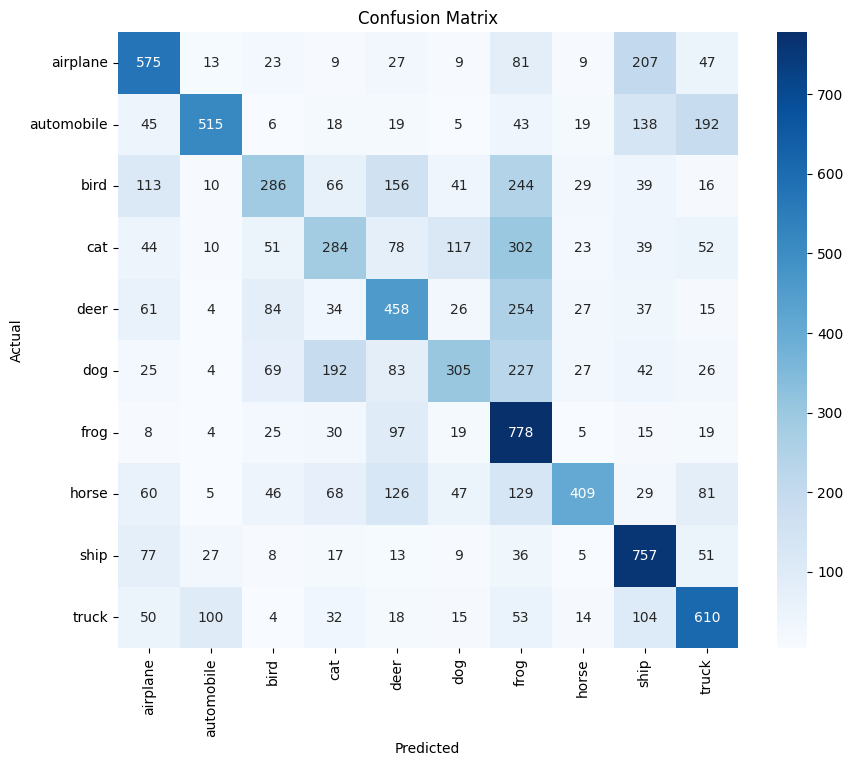

In [37]:
import seaborn as sns

conf_matrix = confusion_matrix(tstLabels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_list, yticklabels=class_list)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Method #2 - CNN Model:
 Building Convolutional layers and connecting them to max pooling layers. (twice), then connecting them to the normal dense layers.

In [38]:
cnn = tf.keras.Sequential([
    # Convolutional layers with max pooling
    layers.Conv2D(filters=64, kernel_size=(3,3), input_shape = (32,32,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), input_shape = (32,32,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Compiling the CNN model

In [39]:
cnn.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

Reshaping the test labels to a 1D array.

In [40]:
tstLabels = tstLabels.reshape(-1,)

Calling the fit function to train the model on the training samples, 10 epochs

In [41]:
cnn.fit(trnImages, trnLabels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.0440 - accuracy: 0.2524
Epoch 2/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6806 - accuracy: 0.4015
Epoch 3/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4708 - accuracy: 0.4738
Epoch 4/10
1563/1563 [==============================] - 98s 62ms/step - loss: 1.3608 - accuracy: 0.5163
Epoch 5/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.2698 - accuracy: 0.5534
Epoch 6/10
1563/1563 [==============================] - 99s 64ms/step - loss: 1.1894 - accuracy: 0.5845
Epoch 7/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.1285 - accuracy: 0.6084
Epoch 8/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.0764 - accuracy: 0.6238
Epoch 9/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.0306 - accuracy: 0.6427
Epoch 10/10
1563/1563 [==============================] - 1

Evaluating the CNN model on new hidden unseen data

In [42]:
cnn.evaluate(tstImages,tstLabels)

313/313 [==============================] - 7s 21ms/step - loss: 1.1108 - accuracy: 0.6119


[1.1108009815216064, 0.6118999719619751]

Classification Report for CNN

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = cnn.predict(tstImages)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report :\n", classification_report(tstLabels,y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.60      0.67      1000
           1       0.70      0.81      0.75      1000
           2       0.60      0.34      0.44      1000
           3       0.48      0.39      0.43      1000
           4       0.48      0.64      0.55      1000
           5       0.59      0.48      0.53      1000
           6       0.46      0.90      0.61      1000
           7       0.73      0.67      0.70      1000
           8       0.76      0.75      0.75      1000
           9       0.81      0.53      0.64      1000

    accuracy                           0.61     10000
   macro avg       0.64      0.61      0.61     10000
weighted avg       0.64      0.61      0.61     10000



Confusion Matrix for CNN

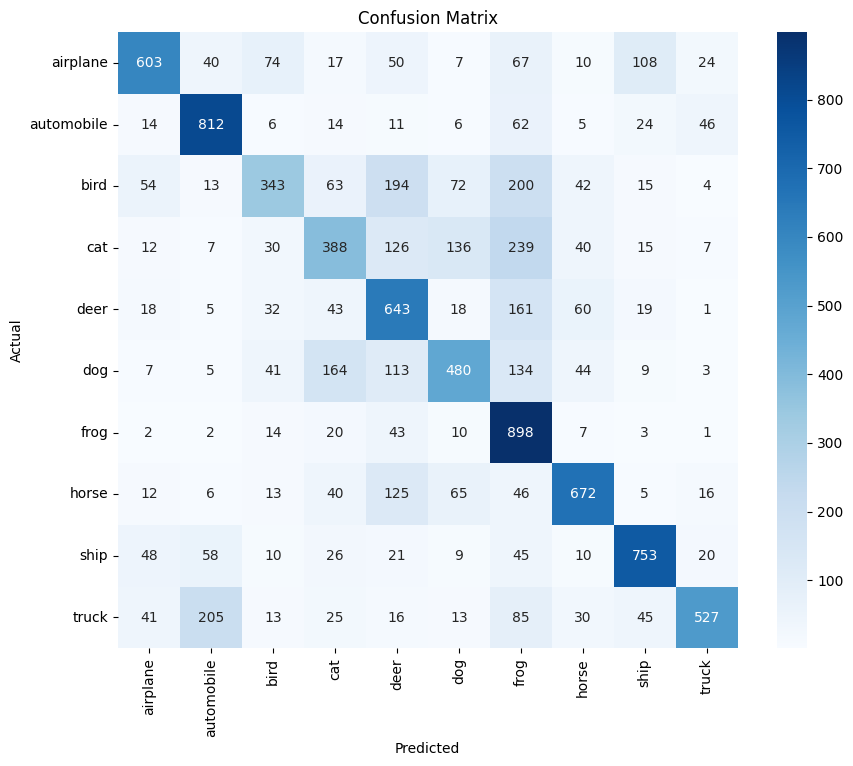

In [44]:
import seaborn as sns

conf_matrix = confusion_matrix(tstLabels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_list, yticklabels=class_list)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Predicting tst images classes

In [45]:
y_pred = cnn.predict(tstImages)
y_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 7s 22ms/step


Predicted Classes for first 10 images

In [46]:
y_classes[:10]

[3, 1, 8, 0, 6, 6, 1, 6, 3, 1]

Actual labels

In [47]:
tstLabels[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

- (We can check the first 10 predicted labels with the actual labels)

Checking class label

In [59]:
class_list[y_classes[9]]

'automobile'

When I ran this, the 9th index in predicted labels matched the  9th index in actual labels, meaning that if I plot index 9, it should give me automobile:

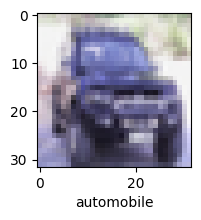

In [60]:
plt_sample(tstImages,tstLabels,9,class_list)

As we can see, the output was an automobile and the model predicted it correctly!